# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv, load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables (find_dotenv is required on my computer)
load_dotenv(find_dotenv('api_keys.env'))

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# Currently own 1.2 BTC and 5.3 ETH
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC and ETH prices via .get and .json
btc_req = requests.get(btc_url)
eth_req = requests.get(eth_url)
btc_json = btc_req.json()
eth_json = eth_req.json()

# Compute current value of my crypto in $USD -- BTC ID is 1, ETH ID is 1027
my_btc_value = my_btc * btc_json['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_json['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44488.80
The current value of your 5.3 ETH is $13061.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares -- SPY and AGG
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret and create Alpaca API object
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [9]:
# Format start/end dates as ISO format
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-24', tz='America/New_York').isoformat()

# Set the tickers and timeframe (1 day)
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Get current closing prices for SPY and AGG using the barset function
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame
portfolio_df.head()

AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756.0   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265.0   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [10]:
# Pick AGG and SPY close prices (locate the most recent close price)
agg_close_price = portfolio_df['AGG']['close'].iloc[-1]
spy_close_price = portfolio_df['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.12
Current SPY closing price: $439.88


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21994.00
The current value of your 200 AGG shares is $22424.00


### Savings Health Analysis

In [12]:
# Set monthly household income (this value taken from the instructions)
monthly_income = 12000

# Consolidate financial assets data (BTC/ETH in crypto, SPY/AGG in shares)
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create and display savings DataFrame with 2 rows and 'Crypto' and 'Shares' as the index
savings_data = {
    'Amount': [crypto, shares]
}
df_savings = pd.DataFrame(savings_data, index=['Crypto', 'Shares'])
display(df_savings)

,Amount
Crypto,57550.226
Shares,44418.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff48d835220>],
      dtype=object)

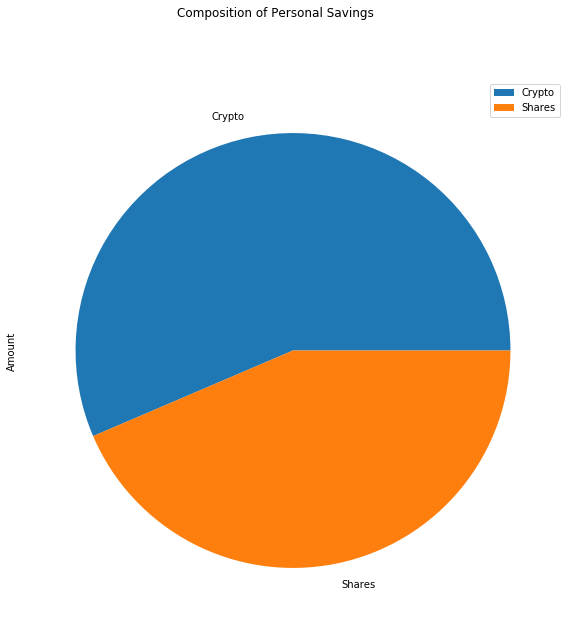

In [13]:
# Plot savings pie chart titled 'Composition of Personal Savings'
df_savings.plot(kind='pie', figsize=(20,10), subplots = True, title = 'Composition of Personal Savings')

In [14]:
# Set ideal emergency fund; ideal emergency fund should be equal to 3x your monthly income
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()

# Validate saving health using an if/else statement (0.2f used for 2-decimal float)
if total_savings > emergency_fund:
    print(f'Good job, your total savings of ${total_savings:0.2f} exceeds your emergency fund of ${emergency_fund:0.2f}.')
elif total_savings == emergency_fund:
    print(f'You have reached your emergency fund goal of ${emergency_fund:0.2f}')
else:
    print(f'You are currently ${emergency_fund - total_savings:0.2f} away from reaching your goal.')

Good job, your total savings of $101968.23 exceeds your emergency fund of $36000.00.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG

# Set tickers and timeframe (1D)
tickers = ['AGG', 'SPY']
timeframe = '1D'

# Create dataframe of current closing prices for the shares using the get_barset function
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [17]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns using 40/60 AGG/SPY through 500 sims
thirty_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)
thirty_year_MC.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tylerhubbard/umnfintech/API-homework/API-homework/Resources and Solution/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999415,1.013585,0.989125,0.999950,0.995930,0.997180,1.000498,1.002227,1.003428,1.005481,...,0.997160,0.998230,0.999495,0.997716,0.996459,1.008872,1.019693,1.007266,0.996129,0.994325
2,1.007375,1.011269,0.989309,1.007210,0.990490,0.990247,1.002921,1.005110,0.995355,1.003970,...,0.983627,0.990155,0.984950,0.995984,1.002867,1.002182,1.039838,1.010855,0.991119,0.995675
3,1.005046,0.998046,1.001327,1.015627,0.995931,0.993148,0.999083,0.995762,0.994613,1.004962,...,0.987781,0.996099,0.994350,0.998541,0.992502,1.004845,1.034967,1.015073,0.992066,0.994932
4,1.002325,1.003313,0.993191,1.017170,0.997634,1.001446,0.995477,0.994476,0.991682,0.999927,...,0.985882,1.006753,0.988295,1.002187,1.001428,0.998062,1.031983,1.023065,0.993588,1.000752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,44.477211,40.463304,15.141299,15.167958,9.381406,3.703097,19.894426,10.068324,11.521504,21.659284,...,59.334474,25.292447,14.188359,14.144821,9.676849,21.165610,23.329401,10.803770,13.493079,16.325427
7557,45.101939,40.910871,15.044148,15.297708,9.351700,3.657327,19.787831,9.834738,11.711604,21.854823,...,59.218784,25.092746,14.339122,14.111250,9.603311,21.237771,23.523293,10.756185,13.697030,16.538705
7558,44.840052,40.535796,15.008366,15.448193,9.438489,3.702469,19.657830,9.808650,11.694085,21.835922,...,59.043267,24.656570,14.403747,13.981410,9.635275,20.927673,23.465150,10.725907,13.728105,16.541521
7559,44.453235,41.103258,14.806293,15.313957,9.661397,3.683936,19.502654,9.852399,11.668487,22.113145,...,58.408579,24.865626,14.156677,14.015756,9.769233,20.872054,23.569574,10.759461,13.678688,16.451471


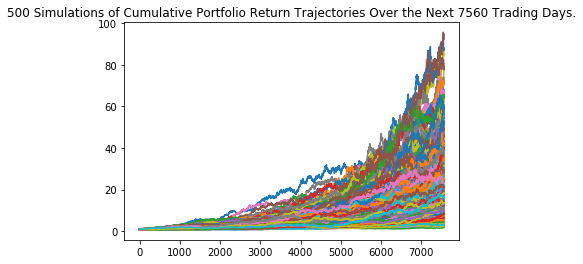

In [19]:
# Plot simulation outcomes using the plot_simulation function
thirty_year_MC.plot_simulation()

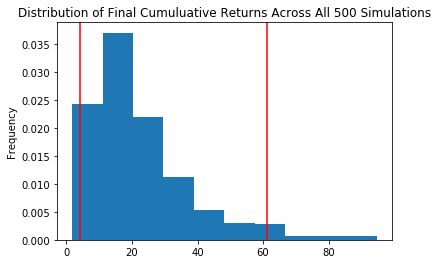

In [20]:
# Plot probability distribution and confidence intervals using the plot_distribution function
thirty_year_MC.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results and print them
tbl = thirty_year_MC.summarize_cumulative_return()
print(tbl)

count           500.000000
mean             22.211774
std              15.334572
min               1.731790
25%              11.463703
50%              17.775122
75%              28.325964
max              94.613844
95% CI Lower      4.027087
95% CI Upper     61.255817
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80541.74 and $1225116.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment and increase it by 50% (1.5x)
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120812.61 and $1837674.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns using the same 40/60 weights
five_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns with .calc_cumulative_return()
five_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tylerhubbard/umnfintech/API-homework/API-homework/Resources and Solution/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009443,0.999013,1.004465,0.989712,1.005100,0.988108,1.010030,0.991680,0.986450,0.998849,...,1.003266,0.990724,1.006000,1.013147,1.002905,1.009177,1.004724,0.999661,1.005821,1.003429
2,1.011071,0.984071,1.017793,0.994602,0.996391,0.992540,0.997411,0.992616,0.975717,1.005858,...,0.998547,0.987777,1.006732,1.003438,0.998640,0.999759,1.007227,1.000308,1.007255,1.016441
3,1.015147,0.973512,1.020624,1.002038,0.992792,1.003867,1.006170,0.993392,0.963497,1.009279,...,0.995145,0.994187,1.010254,1.007047,0.978244,1.011492,1.001319,0.985055,1.007865,1.015546
4,1.014533,0.968293,1.015971,0.986512,0.997995,0.987929,1.000767,0.985826,0.981621,1.004776,...,0.997107,0.994415,1.008481,1.009423,0.981090,1.012619,0.990617,0.992826,1.005494,1.008736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.520570,2.369540,1.212216,1.383651,1.604190,1.282679,0.925688,1.340929,1.989358,2.016478,...,1.928025,2.042767,1.927410,2.395289,1.399405,2.725445,1.817411,1.691339,2.300362,2.003726
1257,1.521194,2.365675,1.203624,1.365770,1.617579,1.281277,0.909856,1.346400,2.014222,2.013686,...,1.942793,2.071639,1.917183,2.377237,1.389074,2.710915,1.809288,1.686274,2.301073,1.991003
1258,1.525150,2.335317,1.210201,1.361211,1.642471,1.270069,0.902612,1.363875,2.006018,2.049270,...,1.984941,2.050085,1.925899,2.363230,1.384007,2.700943,1.797674,1.681452,2.286335,1.988263
1259,1.506684,2.319027,1.206879,1.350225,1.641278,1.262650,0.901048,1.377175,2.019619,2.056626,...,1.989301,2.050946,1.923204,2.354491,1.390447,2.703792,1.818843,1.679297,2.285272,1.994997


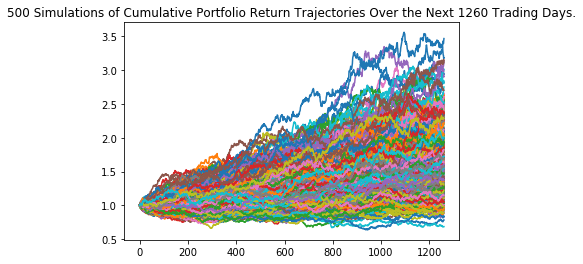

In [28]:
# Double check # of rows and columns
# Plot simulation outcomes with .plot_simulation()
five_year_MC.plot_simulation()

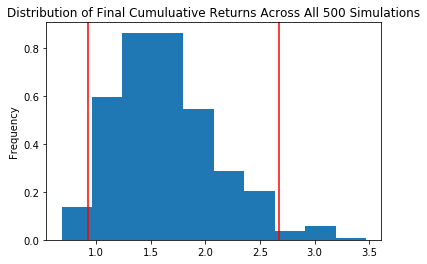

In [29]:
# Plot probability distribution and confidence intervals with .plot_distribution()
five_year_MC.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results with .summarize_cumulative_return() and print it
tbl_2 = five_year_MC.summarize_cumulative_return()
print(tbl_2)

count           500.000000
mean              1.639513
std               0.465405
min               0.685234
25%               1.301367
50%               1.567881
75%               1.927524
max               3.468107
95% CI Lower      0.925005
95% CI Upper      2.676834
Name: 1260, dtype: float64


In [39]:
# Set initial investment, larger this time
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_2[8] * initial_investment, 2)
ci_upper_five = round(tbl_2[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55500.31 and $160610.07


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns, same weights
ten_year_MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns with .calc_cumulative_return()
ten_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tylerhubbard/umnfintech/API-homework/API-homework/Resources and Solution/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002405,0.987611,1.014191,1.007849,1.011454,1.021071,0.991681,0.992663,0.994399,1.002187,...,1.006090,0.989875,0.999795,0.994813,1.000895,1.001530,0.990090,0.993772,1.014523,0.991541
2,1.009246,0.988026,1.012929,0.988221,1.023225,1.025413,0.995755,0.997651,0.987059,1.006589,...,1.011000,0.989392,1.003684,0.990535,0.996549,0.997618,0.974762,0.988365,0.998926,0.995997
3,1.005183,0.984643,1.005273,0.999971,1.026406,1.042727,0.989491,0.998950,0.982965,0.999746,...,1.007002,0.993585,0.998776,0.976401,0.997594,0.976229,0.980901,0.992391,0.997801,0.987809
4,0.995280,0.992310,1.012543,1.009308,1.023509,1.037251,0.989498,0.991214,0.982485,1.009522,...,1.020402,1.010706,1.004051,0.972295,1.000894,0.972056,0.976765,0.991014,0.978894,0.975195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.984278,1.673883,4.860464,2.939468,3.349323,3.528795,3.007458,2.355287,5.508593,2.855390,...,2.210264,4.863632,2.819019,3.492720,3.980043,1.780027,2.795029,1.868997,2.485368,2.167422
2517,1.947408,1.648267,4.906989,2.967822,3.327701,3.550664,2.995562,2.369023,5.470380,2.902338,...,2.206590,4.858141,2.812367,3.485352,3.955501,1.784566,2.777018,1.868038,2.515434,2.171383
2518,1.963658,1.650030,4.908857,2.981933,3.330043,3.574298,3.008719,2.382766,5.513318,2.887044,...,2.216674,4.871470,2.801602,3.453309,3.928431,1.779424,2.761757,1.885895,2.488558,2.160388
2519,1.983481,1.650605,4.929103,3.022128,3.330235,3.567883,2.983047,2.374283,5.560689,2.900254,...,2.236573,4.840605,2.806058,3.444124,3.977921,1.796384,2.763100,1.871019,2.477385,2.132423


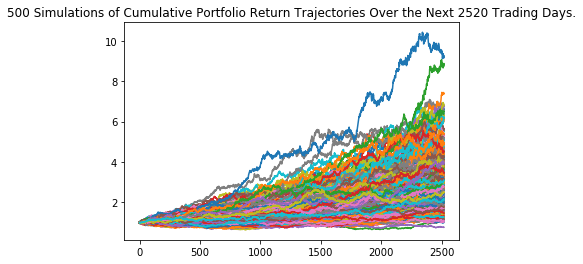

In [42]:
# Double-check column and rows
# Plot simulation outcomes with plot_simulation()
ten_year_MC.plot_simulation()

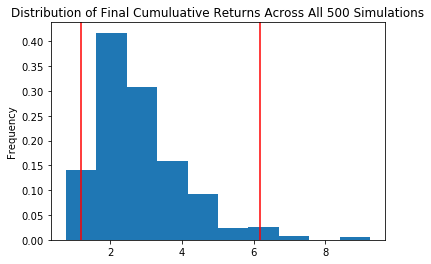

In [43]:
# Plot probability distribution and confidence intervals with plot_distribution()
ten_year_MC.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results and print them
tbl_3 = ten_year_MC.summarize_cumulative_return()
print(tbl_3)

count           500.000000
mean              2.822544
std               1.219389
min               0.769440
25%               1.965230
50%               2.557255
75%               3.392290
max               9.248992
95% CI Lower      1.199314
95% CI Upper      6.169991
Name: 2520, dtype: float64


In [45]:
# Set initial investment (using the same $60000 from the 5 year option)
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_3[8] * initial_investment, 2)
ci_upper_ten = round(tbl_3[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71958.84 and $370199.47
